## Test sample of measured galaxies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_hdf('subset_data.h5', key='galaxies')
data.head()

,GALAXY,BA_LEDA,PA_LEDA,RA_LEDA,DEC_LEDA,MORPHTYPE,D26,ETA_r,PA_r,ASCALE_r,MAXRAD_r,ETA_g,PA_g,ASCALE_g,MAXRAD_g,ETA_z,PA_z,ASCALE_z,MAXRAD_z
0,PGC1283207,0.724436,152.199997,228.377086,5.423202,S?,0.494706,"[0.4678828880508248, 0.4216080601298338, 0.383...","[1.375160801739467, 0.4105210202462915, 0.5935...",6.935615,39.260250,"[0.4754169341087222, 0.4297840513028913, 0.390...","[0.8307088063809002, 0.37115790513208474, 0.51...",6.637332,33.437030,"[0.39540261966047835, 0.37244042572129904, 0.3...","[0.44968605338321727, 0.5044430846158698, 0.51...",10.518903,57.934098
1,PGC1310416,0.781628,159.259995,202.544438,6.934594,Sc,0.553505,"[0.44275151050312567, 0.40379418382802784, 0.3...","[-0.0349364475471593, -0.3560425069003177, -0....",13.288824,61.131832,"[0.45839435283292923, 0.42938607495719666, 0.4...","[-0.02742804921649018, -0.36155519588363333, -...",12.801525,55.965553,"[0.3932368625384318, 0.373211797551351, 0.3599...","[-0.1803940716908227, -0.33324964731094125, -0...",15.431842,69.000000
2,SDSSJ145059.93+135143.0,0.663743,44.570000,222.749787,13.861911,S?,0.370675,"[0.29456968680009915, 0.2734913357504643, 0.24...","[-0.23389272985180704, -0.2778370199119045, -0...",7.318237,30.105364,"[0.261012032878009, 0.24829486539329315, 0.231...","[-0.3844617568838641, 0.2906920155999025, -0.1...",8.229772,25.930750,"[0.2267968880331406, 0.21525207110763453, 0.21...","[-0.5588813683724241, 0.20535526111069957, 0.5...",16.086431,57.000000
3,PGC1742504,0.251189,84.970001,182.088808,25.602276,Sbc,0.888320,"[0.4732689975771392, 0.4435481361770859, 0.419...","[0.7350808649192389, 1.5114817053467189, 1.501...",13.175870,50.793228,"[0.5234434266653717, 0.4830101025835774, 0.455...","[1.0177964414365988, 0.6347019704207996, 1.524...",10.105528,38.532002,"[0.39385157739266957, 0.4014243425487404, 0.43...","[0.36277910247770473, 0.6918944155104017, 0.17...",36.272175,94.000000
4,SDSSJ173412.71+572041.6,0.533335,152.580002,263.552935,57.344907,S?,0.446012,"[0.31984025364753743, 0.303190383168049, 0.289...","[0.8249077127573693, 0.7952308915873015, 0.626...",8.853683,34.379651,"[0.3190807682081503, 0.30466682451613125, 0.29...","[1.1091609754868874, 0.7283095835703775, 0.602...",8.982995,31.913447,"[0.2786772940940266, 0.26658113094785074, 0.26...","[1.4757063021266255, 0.9365203135117481, 1.185...",32.975406,77.000000


There are six measurements for eta, using `ASCALE_{}` as the scaling values `[0.75,1., 1.5, 2.0, 2.5,3.0]`. In the next cell we'll select the fiducial scaling value of 1. But in principle you can compare the different scalings to see if anything changes for eta when the fit scale length changes.

This also works for PAs, see the next next cell.

In [8]:
eta_g = np.array([data['ETA_g'][i][1] for i in data['ETA_g'].index])
eta_r = np.array([data['ETA_r'][i][1] for i in data['ETA_r'].index])
eta_z = np.array([data['ETA_z'][i][1] for i in data['ETA_z'].index])
print(eta_g[eta_g>0].size)

2247


In [9]:
pa_g = np.array([data['PA_g'][i][1] for i in data['PA_g'].index])
pa_r = np.array([data['PA_r'][i][1] for i in data['PA_r'].index])
pa_z = np.array([data['PA_z'][i][1] for i in data['PA_z'].index])
print(pa_g[pa_g>-5.].size)

2247


Text(0, 0.5, 'ETA_r')

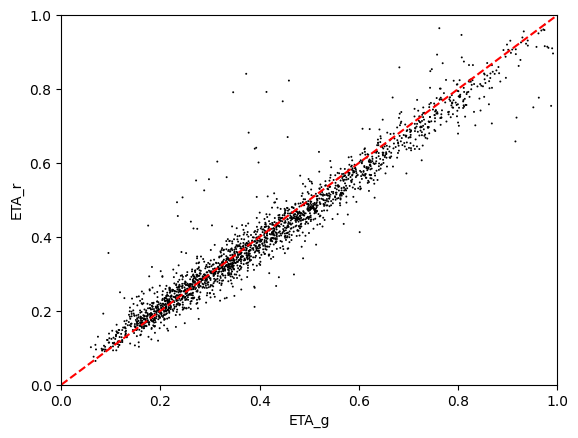

In [10]:
# plot the eta values
plt.scatter(eta_g,eta_r,edgecolor='none',facecolor='black',s=2.)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.axis([0.,1,0.,1.])
plt.xlabel('ETA_g')
plt.ylabel('ETA_r')

Text(0, 0.5, 'PA_r')

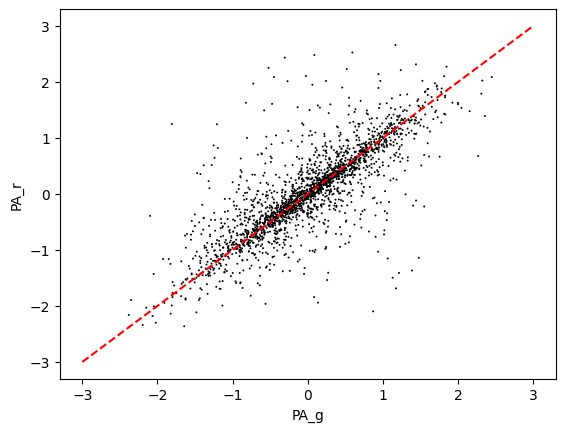

In [14]:
# plot the PA values
plt.scatter(pa_g,pa_r,edgecolor='none',facecolor='black',s=2.)
plt.plot([-3.,3],[-3.,3.],color='red',linestyle='--')
#plt.axis([0.,1,0.,1.])
plt.xlabel('PA_g')
plt.ylabel('PA_r')

In [12]:
pa_g

array([ 0.37115791, -0.3615552 ,  0.29069202, ...,  0.61040592,
       -0.57459599,  0.4672515 ])